In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


**Loading the dataset**

In [22]:
# load the dataset into a pandas DataFrame
house_price = pd.read_csv('/content/Question4.csv')

In [23]:
house_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
house_price.shape

(21613, 21)

In [25]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [26]:
house_price.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [27]:
# converting the date column to datetime format for better analysis
house_price["date"] = pd.to_datetime(house_price["date"])

**Nan Count**

In [28]:
nan_count = house_price.isna().sum()
print(nan_count)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


**Correlation**

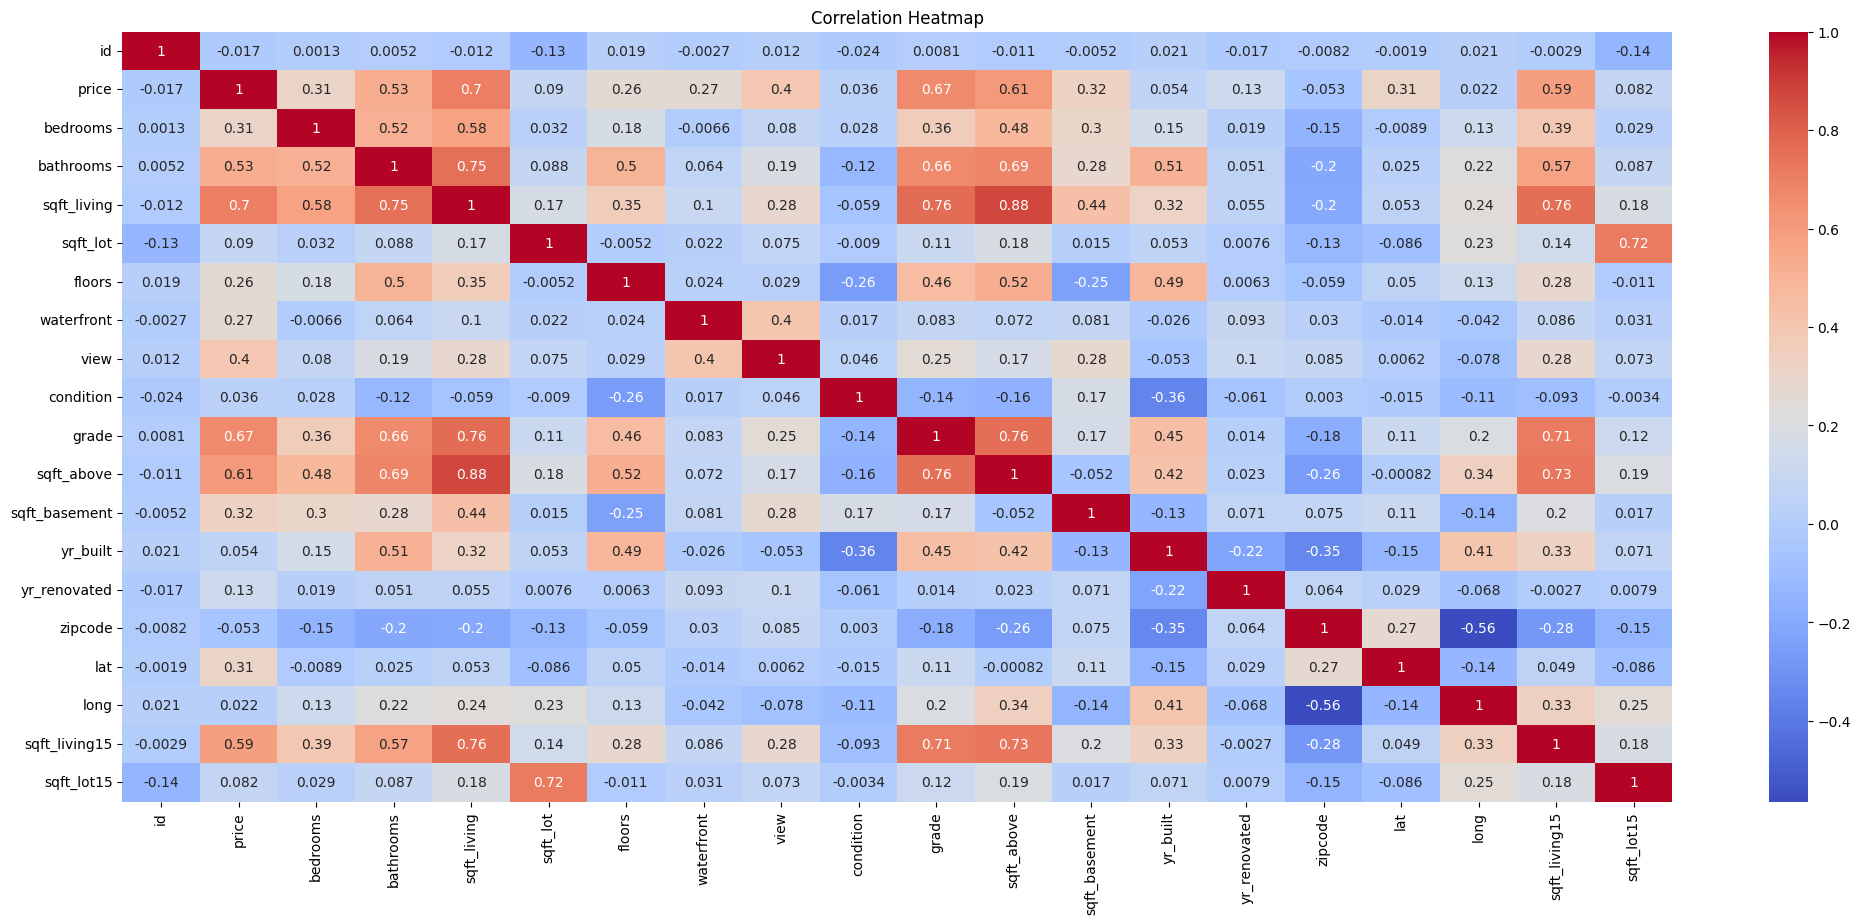

In [29]:
# visualize the correlation between numerical features using a heatmap of the correlation matrix
numeric_cols = house_price.select_dtypes(include = [np.number])
plt.figure(figsize = (25, 10))
sns.heatmap(numeric_cols.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Price Distribution**

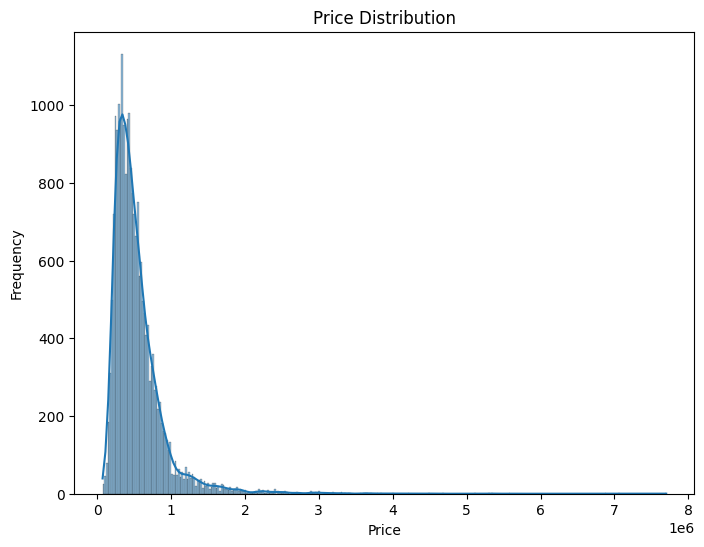

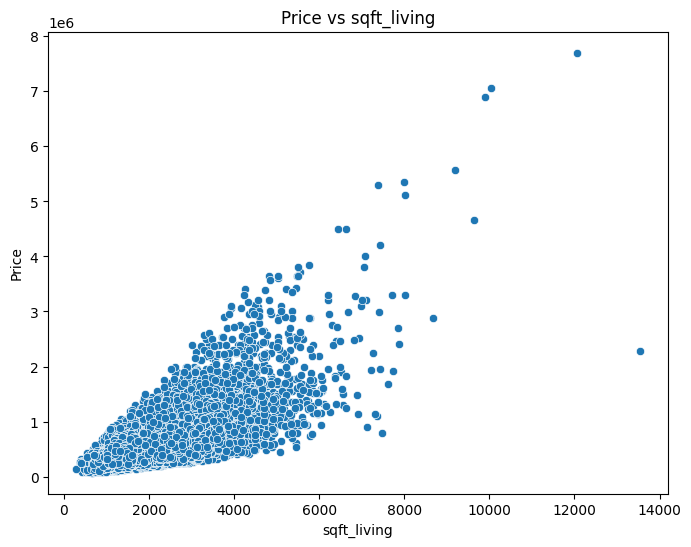

In [30]:

correlation_matrix = house_price.corr()
price_corr = correlation_matrix['price'].drop('price')
highest_corr_feature = price_corr.idxmax()
plt.figure(figsize=(8, 6))
sns.histplot(house_price['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=house_price[highest_corr_feature], y=house_price['price'])
plt.title(f'Price vs {highest_corr_feature}')
plt.xlabel(highest_corr_feature)
plt.ylabel('Price')
plt.show()


**Changing Date**

In [31]:


house_price['year'] = house_price['date'].dt.year
house_price['month'] = house_price['date'].dt.month

house_price = house_price.drop(columns=['date'])

print(house_price.head())


           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0           0     0          3  ...              0      1955             0   
1           0     0          3  ...            400      1951          1991   
2           0     0          3  ...              0      1933             0   
3           0     0          5  ...            910      1965             0   
4           0     0          3  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15 

**Training and validation data**

In [32]:

train_data, validation_data = train_test_split(house_price, test_size=0.25, random_state=42)
print(f'Train data shape: {train_data.shape}')
print(f'Validation data shape: {validation_data.shape}')


Train data shape: (16209, 22)
Validation data shape: (5404, 22)


**MinMaxScaler**

In [33]:

features = house_price.columns.drop(['price'])
scaler = MinMaxScaler()
train_data_scaled = train_data.copy()
train_data_scaled[features] = scaler.fit_transform(train_data[features])
validation_data_scaled = validation_data.copy()
validation_data_scaled[features] = scaler.transform(validation_data[features])
print(train_data_scaled.head())
print(validation_data_scaled.head())


             id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5945   0.920901  268643.0  0.121212    0.28125     0.129252  0.007490     0.4   
8423   0.676774  245000.0  0.090909    0.31250     0.111395  0.001948     0.4   
13488  0.728524  200000.0  0.121212    0.31250     0.121599  0.006973     0.4   
20731  0.864914  352499.0  0.060606    0.28125     0.080782  0.000159     0.4   
2358   0.783857  232000.0  0.090909    0.25000     0.084184  0.011025     0.0   

       waterfront  view  condition  ...  sqft_basement  yr_built  \
5945          0.0   0.0       0.50  ...       0.000000  0.530435   
8423          0.0   0.0       0.75  ...       0.000000  0.800000   
13488         0.0   0.0       0.50  ...       0.000000  0.817391   
20731         0.0   0.0       0.50  ...       0.018672  0.947826   
2358          0.0   0.0       0.50  ...       0.000000  0.817391   

       yr_renovated   zipcode       lat      long  sqft_living15  sqft_lot15  \
5945            0.0  0.2

**MLP Model with One Hidden Layer**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 411614183424.0000 - mae: 535338.1250 - val_loss: 449642856448.0000 - val_mae: 547782.2500
Epoch 2/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 417249886208.0000 - mae: 538248.6875 - val_loss: 449102905344.0000 - val_mae: 547316.9375
Epoch 3/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 409851002880.0000 - mae: 533690.6250 - val_loss: 448266403840.0000 - val_mae: 546595.6250
Epoch 4/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 419854188544.0000 - mae: 537613.5000 - val_loss: 447180832768.0000 - val_mae: 545658.2500
Epoch 5/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 405854846976.0000 - mae: 529181.0625 - val_loss: 445871226880.0000 - val_mae: 544524.8125
Epoch 6/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 399281356800.0000 - mae: 528147.3125 - val_loss: 444362653696.0000 - val_mae: 543217.0000
Epoch 7/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 409102123008.0000 - mae: 529983.5000 - val_lo

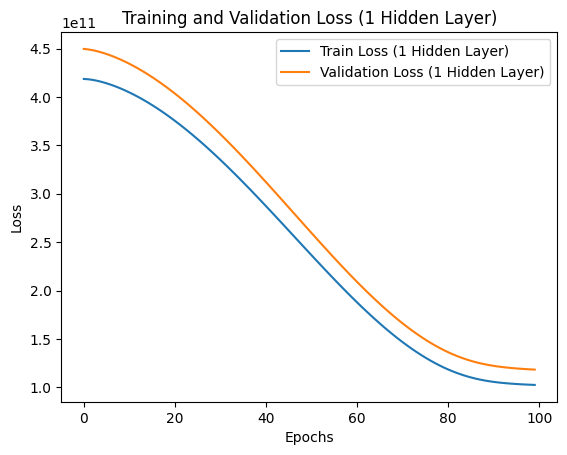

In [34]:

# Define features and target
features = train_data_scaled.columns.drop('price')  # Assuming 'price' is the target column

# MLP with one hidden layer
model_one_hidden = Sequential([
    Dense(64, activation='relu', input_shape=(train_data_scaled.shape[1] - 1,)),  # Single hidden layer
    Dense(1)  # Output layer
])

# Compile model
model_one_hidden.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_one_hidden = model_one_hidden.fit(
    train_data_scaled[features], train_data_scaled['price'],
    validation_data=(validation_data_scaled[features], validation_data_scaled['price']),
    epochs=100, batch_size=32
)

# Plot training and validation loss
plt.plot(history_one_hidden.history['loss'], label='Train Loss (1 Hidden Layer)')
plt.plot(history_one_hidden.history['val_loss'], label='Validation Loss (1 Hidden Layer)')
plt.title('Training and Validation Loss (1 Hidden Layer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**MLP Model with Two Hidden Layers**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 404221394944.0000 - mae: 530507.3750 - val_loss: 443994636288.0000 - val_mae: 542896.4375
Epoch 2/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 399940091904.0000 - mae: 523960.6875 - val_loss: 404602322944.0000 - val_mae: 507579.7812
Epoch 3/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 359293681664.0000 - mae: 480950.7812 - val_loss: 323927638016.0000 - val_mae: 426668.8125
Epoch 4/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 271564947456.0000 - mae: 386354.6250 - val_loss: 228174233600.0000 - val_mae: 308584.1250
Epoch 5/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 175147417600.0000 - mae: 264877.3125 - val_loss: 156924559360.0000 - val_mae: 218419.7500
Epoch 6/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 119015530496.0000 - mae: 199568.1562 - val_loss: 126066171904.0000 - val_mae: 200036.8125
Epoch 7/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 107896242176.0000 - mae: 192368.2656 - val_lo

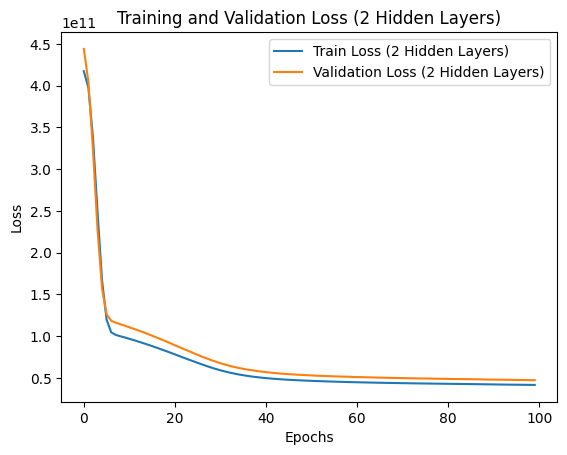

In [35]:
# MLP with two hidden layers
model_two_hidden = Sequential([
    Dense(64, activation='relu', input_shape=(train_data_scaled.shape[1] - 1,)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer
])

# Compile model
model_two_hidden.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_two_hidden = model_two_hidden.fit(
    train_data_scaled[features], train_data_scaled['price'],
    validation_data=(validation_data_scaled[features], validation_data_scaled['price']),
    epochs=100, batch_size=32
)

# Plot training and validation loss
plt.plot(history_two_hidden.history['loss'], label='Train Loss (2 Hidden Layers)')
plt.plot(history_two_hidden.history['val_loss'], label='Validation Loss (2 Hidden Layers)')
plt.title('Training and Validation Loss (2 Hidden Layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Compare and Analyze the Results**

In [36]:
# Extract minimum validation loss and optimal epochs
optimal_epochs_one = min(range(len(history_one_hidden.history['val_loss'])), key=history_one_hidden.history['val_loss'].__getitem__)
optimal_epochs_two = min(range(len(history_two_hidden.history['val_loss'])), key=history_two_hidden.history['val_loss'].__getitem__)

final_val_loss_one = history_one_hidden.history['val_loss'][optimal_epochs_one]
final_val_loss_two = history_two_hidden.history['val_loss'][optimal_epochs_two]

print(f"One hidden layer - Optimal epochs: {optimal_epochs_one+1}, Final Validation Loss: {final_val_loss_one}")
print(f"Two hidden layers - Optimal epochs: {optimal_epochs_two+1}, Final Validation Loss: {final_val_loss_two}")


One hidden layer - Optimal epochs: 100, Final Validation Loss: 118282764288.0
Two hidden layers - Optimal epochs: 100, Final Validation Loss: 47171440640.0


**5 random samples from the validation se**

In [37]:

# Identify the best model based on validation loss
best_model = model_one_hidden if final_val_loss_one < final_val_loss_two else model_two_hidden

# Randomly select 5 samples from the validation set
random_indices = np.random.choice(validation_data_scaled.index, 5, replace=False)
sample_data = validation_data_scaled.loc[random_indices]

# Separate features for prediction
sample_features = sample_data[features]

# Predict prices using the best model
predicted_prices = best_model.predict(sample_features)

# Display actual and predicted prices
results = pd.DataFrame({
    'Actual Price': sample_data['price'].values,
    'Predicted Price': predicted_prices.flatten()
}, index=random_indices)

print("Sample Predictions:")
print(results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Sample Predictions:
       Actual Price  Predicted Price
14041      805000.0     1.053177e+06
3328       487028.0     3.274055e+05
21273      775000.0     7.053890e+05
13960      695000.0     7.007062e+05
18151      412000.0     4.050267e+05
